In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('mandar_gurgaon_properties_missing_value_imputation.csv')

In [4]:
df.shape

(3554, 18)

In [5]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,umang monsoon breeze,sector 78,0.75,6053.0,2,2,1,5.0,Moderately Old,1239.0,0,0,0,0,0,0,0
1,flat,ireo skyon,sector 60,2.15,23344.0,2,3,2,5.0,Relatively New,1250.0,0,1,0,0,0,1,49
2,flat,dlf regal gardens,sector 90,1.23,7053.0,3,3,2,19.0,Relatively New,1578.0,0,0,0,0,1,0,6
3,house,independent,sector 2,5.00,15385.0,6,6,2,1.0,Moderately Old,3611.0,0,0,0,0,0,0,0
4,flat,dlf the arbour,sector 63,7.52,18999.0,4,4,3,15.0,New Property,3956.0,0,0,0,0,0,0,61


In [6]:
train_df = df.drop(columns=['society','price_per_sqft'])

In [7]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 78,0.75,2,2,1,5.0,Moderately Old,1239.0,0,0,0,0,0,0,0
1,flat,sector 60,2.15,2,3,2,5.0,Relatively New,1250.0,0,1,0,0,0,1,49
2,flat,sector 90,1.23,3,3,2,19.0,Relatively New,1578.0,0,0,0,0,1,0,6
3,house,sector 2,5.00,6,6,2,1.0,Moderately Old,3611.0,0,0,0,0,0,0,0
4,flat,sector 63,7.52,4,4,3,15.0,New Property,3956.0,0,0,0,0,0,0,61


### luxury score

<Axes: xlabel='luxury_score'>

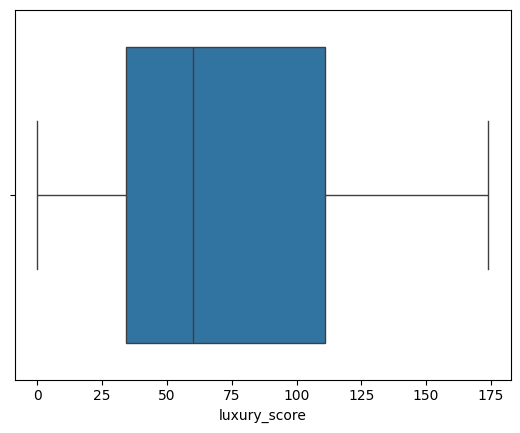

In [8]:
sns.boxplot(x=df['luxury_score'])

In [9]:
# we will convert the luxury score into categorical values - Low, Medium, High

def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins

In [10]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [11]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,sector 78,0.75,2,2,1,5.0,Moderately Old,1239.0,0,0,0,0,0,0,0,Low
1,flat,sector 60,2.15,2,3,2,5.0,Relatively New,1250.0,0,1,0,0,0,1,49,Low
2,flat,sector 90,1.23,3,3,2,19.0,Relatively New,1578.0,0,0,0,0,1,0,6,Low
3,house,sector 2,5.00,6,6,2,1.0,Moderately Old,3611.0,0,0,0,0,0,0,0,Low
4,flat,sector 63,7.52,4,4,3,15.0,New Property,3956.0,0,0,0,0,0,0,61,Medium


### floorNum 
## for this also we are not going to ask the user about floor number specifically. Rather we will ask about do you want low rise ie 1 to 2 floor, or medium rise or high rise

<Axes: xlabel='floorNum'>

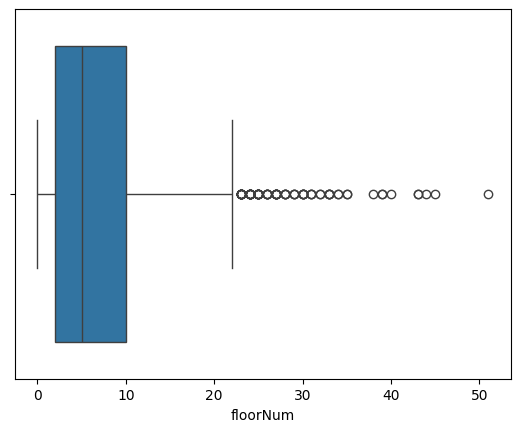

In [12]:
sns.boxplot(x=df['floorNum'])

In [13]:
# converting the floors into categories

def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins

In [14]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [15]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,flat,sector 78,0.75,2,2,1,5.0,Moderately Old,1239.0,0,0,0,0,0,0,0,Low,Mid Floor
1,flat,sector 60,2.15,2,3,2,5.0,Relatively New,1250.0,0,1,0,0,0,1,49,Low,Mid Floor
2,flat,sector 90,1.23,3,3,2,19.0,Relatively New,1578.0,0,0,0,0,1,0,6,Low,High Floor
3,house,sector 2,5.00,6,6,2,1.0,Moderately Old,3611.0,0,0,0,0,0,0,0,Low,Low Floor
4,flat,sector 63,7.52,4,4,3,15.0,New Property,3956.0,0,0,0,0,0,0,61,Medium,High Floor


In [16]:
# now we can drop floor number and luxury score

train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [17]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,sector 78,0.75,2,2,1,Moderately Old,1239.0,0,0,0,0,0,0,Low,Mid Floor
1,flat,sector 60,2.15,2,3,2,Relatively New,1250.0,0,1,0,0,0,1,Low,Mid Floor
2,flat,sector 90,1.23,3,3,2,Relatively New,1578.0,0,0,0,0,1,0,Low,High Floor
3,house,sector 2,5.00,6,6,2,Moderately Old,3611.0,0,0,0,0,0,0,Low,Low Floor
4,flat,sector 63,7.52,4,4,3,New Property,3956.0,0,0,0,0,0,0,Medium,High Floor


## Now we can start with feature selection here

##### so first we need to convert the categorical columns which are written in english to numbers as our feature selection techniques works on numbers

In [18]:
from sklearn.preprocessing import OrdinalEncoder
# ordinal encoder converts categorical columns which are in english to numbers ie eg flat is 0 and house is 1

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'sector 1',
       'sector 102', 'sector 103', 'sector 104', 'sector 105',
       'sector 106', 'sector 107', 'sector 108', 'sector 109',
       'sector 10a', 'sector 11', 'sector 110', 'sector 111',
       'sector 112', 'sector 113', 'sector 12', 'sector 13', 'sector 14',
       'sector 15', 'sector 17', 'sector 17a', 'sector 17b', 'sector 2',
       'sector 21', 'sector 22', 'sector 23', 'sector 24', 'sector 25',
       'sector 26', 'sector 27', 'sector 28', 'sector 3',
       'sector 3 phase 2', 'sector 3 phase 3 extension', 'sector 30',
       'sector 31', 'sector 33', 'sector 36', 'sector 36a', 'sector 37',
       'sector 37c', 'sector 37d', 'sector 38', 'sector 39', 'sector 4',
       'sector 40', 'sector 41', 'sector 43', 'sector 45', 'sector 46',
       'sector 47', 'sector 48', 'sector 49', 'sector 5', 'sector 50',
       'sector 51', 'sector 52', 'sector 53', 'sector 54', 'sector 5

In [19]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,88.0,2,2,1.0,0.0,1239.0,0,0,0,0,0,0,1.0,2.0
1,0.0,68.0,2,3,2.0,3.0,1250.0,0,1,0,0,0,1,1.0,2.0
2,0.0,103.0,3,3,2.0,3.0,1578.0,0,0,0,0,1,0,1.0,0.0
3,1.0,25.0,6,6,2.0,0.0,3611.0,0,0,0,0,0,0,1.0,1.0
4,0.0,71.0,4,4,3.0,1.0,3956.0,0,0,0,0,0,0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,17.0,5,4,4.0,1.0,2956.0,0,0,0,1,0,2,1.0,1.0
3550,0.0,0.0,3,3,2.0,4.0,1267.0,0,0,0,0,0,0,1.0,2.0
3551,0.0,57.0,3,4,4.0,0.0,2470.0,0,1,0,0,0,1,0.0,2.0
3552,0.0,98.0,3,3,3.0,0.0,1747.0,0,1,0,1,0,0,2.0,0.0


In [20]:
# this is price column which is output
y_label

0       0.75
1       2.15
2       1.23
3       5.00
4       7.52
        ... 
3549    3.72
3550    1.30
3551    2.65
3552    1.30
3553    1.55
Name: price, Length: 3554, dtype: float64

### Now each feature is converted into number.
### We will apply 8 feature selection techniques. For each technique, each feature will get a score. Then at the end, for every feature, we will merge the scores of all 8 techniques and calculate the average or sum, and the features which will have the largest average or sum value, those features will be considered as important
### Technique 1 - Correlation Analysis

<Axes: >

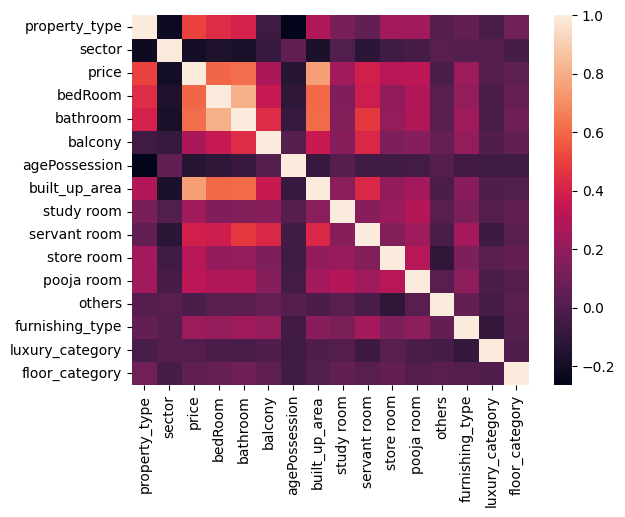

In [21]:
 sns.heatmap(data_label_encoded.corr())

In [22]:
# checking correlation of each feature with price column

fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,sector,-0.201678
1,price,1.000000
2,bedRoom,0.591289
3,bathroom,0.609777
4,balcony,0.269637
5,agePossession,-0.132989
6,built_up_area,0.748574
7,study room,0.242955
8,servant room,0.391930
9,store room,0.305677


### Technique 2 - Random Forest Feature Importance

In [23]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

""" Tree based algorithms have an inherent feature that gives us feature importance.
During training, they calculate the feature importance for each feature. So we just train a random forest model and call the feature 
importance scores.
"""

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns, 
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2
# according to this the built_up_area has highest importance

,feature,rf_importance
6,built_up_area,0.651067
1,sector,0.106126
0,property_type,0.099858
3,bathroom,0.026065
2,bedRoom,0.023883
8,servant room,0.018923
5,agePossession,0.013230
4,balcony,0.012741
12,furnishing_type,0.009527
7,study room,0.009439


### Technique 3 - Gradient Boosting Feature importances

In [24]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Gradient Boosting regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3
# according to this the built_up_area has highest importance


,feature,gb_importance
6,built_up_area,0.682921
1,sector,0.100806
0,property_type,0.097078
2,bedRoom,0.038632
3,bathroom,0.035385
8,servant room,0.021625
9,store room,0.009543
5,agePossession,0.005449
7,study room,0.003668
12,furnishing_type,0.002405


### as the categorical features which were written in english were converted to numbers, it might happen that if you use some feature selection techniques which uses Linear Model, then there will be an issue. eg the property_type is flat or house which is converted to 0 and 1. So it might happen that 0 is given lower importance and 1 is given higher importance. Due to this, the importance scores wont be reliable. Therefore we must use One Hot Encoding in case of linear model feature selection techniques. Here, as we were not using linear models then converting the features to Ordinal Encoding is fine. It will give reliable results.

### Technique 4 - Permutation Importance

##### eg you have 3 features f1,f2,f3 and one output column target. Now we want to find which features are importance for predicting the target column. So in permutation importance, you will train a model using all the 3 features and you will get a model score say 0.82.

##### then you take f1 and jumble all the values in f1 and keep f2, f3, and target fixed. So now as we jumbled f1, the relationship between f1 and target will become bad ie kharab ho jayega. Now we will train a second model using jumbled f1 and all others f2, f3, target fixed and you will get a model score say 0.67. Now we can understand from this that f1 is important because if you jumbled f1 then only the model score reduced.

##### if after jumbling also score would be 0.81 then, we would conclude that f1 is not that important. This same process is done with f2 and f3 and then calculate importance.

In [25]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.718382
0,property_type,0.215220
1,sector,0.153427
2,bedRoom,0.021918
3,bathroom,0.015736
8,servant room,0.010696
5,agePossession,0.003651
4,balcony,0.002343
7,study room,0.001268
11,others,0.000895


In [26]:
# here also we observe that built_up_area has highest importance

### Technique 5 - LASSO
### this is a linear model. But here linear models won't be that much reliable as we have given ordinal encoding to the categorical columns. But let's see what happens

In [27]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5


,feature,lasso_coeff
6,built_up_area,1.510996
0,property_type,0.716163
3,bathroom,0.275703
9,store room,0.198987
7,study room,0.171491
12,furnishing_type,0.168610
8,servant room,0.161408
10,pooja room,0.073317
13,luxury_category,0.055785
2,bedRoom,0.014270


#### above we can see that built_up_area has highest value. But the sector has got negative importance. Sector is a useful column, but since we did ordinal encoding, it is being seen as sector is not important

### Technique 6 - RFE (Recursive Feature Elimination)
### ie train a model using all features, then train using a subset of features. Do this repeatedly and you will get the feature importances

In [28]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6


,feature,rfe_score
6,built_up_area,0.649906
1,sector,0.108889
0,property_type,0.101148
2,bedRoom,0.023835
3,bathroom,0.023774
8,servant room,0.019335
5,agePossession,0.014944
4,balcony,0.012876
12,furnishing_type,0.009175
7,study room,0.008463


### Technique 7 - Linear Regression Weights (Just consider weights as importances here). This technique is not that reliable because we have used the ordinal encoding which is not good not linear models

In [29]:
from sklearn.linear_model import LinearRegression

# Train a linear regression model on the label-encoded and standardized training data
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7


,feature,reg_coeffs
6,built_up_area,1.513525
0,property_type,0.716606
3,bathroom,0.282176
9,store room,0.203396
7,study room,0.179416
12,furnishing_type,0.178169
8,servant room,0.170720
10,pooja room,0.076303
13,luxury_category,0.067360
2,bedRoom,0.017095


### Technique 8 - SHAP

In [30]:
!pip install shap

In [31]:
import shap

In [32]:
# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=10, random_state=42, n_jobs=-1)
rf.fit(X_label, y_label)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=42)

In [33]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

In [34]:
# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values

array([[-1.73097898e-01, -1.96632060e-01, -5.55113017e-02, ...,
        -7.49801986e-03,  6.24974360e-04, -1.38753354e-02],
       [-2.14424344e-01,  6.44688694e-01, -4.08615662e-02, ...,
         8.22489963e-03,  6.09221062e-03, -2.39841074e-02],
       [-2.22225957e-01, -4.82331437e-01,  1.41512673e-02, ...,
        -8.95963166e-03,  7.77120587e-03,  3.95106109e-02],
       ...,
       [-5.62678921e-01,  3.10682220e-01, -2.75114034e-02, ...,
        -2.67294234e-02,  1.66501008e-02, -9.95931211e-02],
       [-2.34803154e-01, -4.40080322e-01, -7.87172298e-03, ...,
         1.25142205e-03, -6.53865931e-03, -2.69082266e-03],
       [ 5.18394561e-01, -3.72712646e-01, -6.72654503e-02, ...,
         2.57999840e-02,  7.68069969e-03, -1.01029942e-02]])

In [35]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
6,built_up_area,1.279107
0,property_type,0.494147
1,sector,0.385929
8,servant room,0.097720
3,bathroom,0.095169
2,bedRoom,0.058395
4,balcony,0.051329
14,floor_category,0.031028
5,agePossession,0.029908
12,furnishing_type,0.026292


In [36]:
# here we merged all the dataframes of each techniques

final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')

In [37]:
final_fi_df


,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,-0.201678,0.106126,0.100806,0.153427,-0.057487,0.108889,-0.066567,0.385929
bedRoom,0.591289,0.023883,0.038632,0.021918,0.014270,0.023835,0.017095,0.058395
bathroom,0.609777,0.026065,0.035385,0.015736,0.275703,0.023774,0.282176,0.095169
balcony,0.269637,0.012741,0.001535,0.002343,-0.043580,0.012876,-0.066376,0.051329
agePossession,-0.132989,0.013230,0.005449,0.003651,-0.000000,0.014944,0.002764,0.029908
built_up_area,0.748574,0.651067,0.682921,0.718382,1.510996,0.649906,1.513525,1.279107
study room,0.242955,0.009439,0.003668,0.001268,0.171491,0.008463,0.179416,0.015516
servant room,0.391930,0.018923,0.021625,0.010696,0.161408,0.019335,0.170720,0.097720
store room,0.305677,0.006927,0.009543,-0.002674,0.198987,0.007720,0.203396,0.017179


In [38]:
# as we can see that the columns are not normalized, some have high values like 1.51 etc. So we need to normalize them first

# normalize the score along each column and find the sum of all values in a row
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [39]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

# this is the mean feature importance of all the columns. 

feature
built_up_area      0.716005
sector             0.139548
bathroom           0.031253
bedRoom            0.029389
servant room       0.024780
balcony            0.011359
agePossession      0.011068
furnishing_type    0.007136
study room         0.006523
store room         0.006404
floor_category     0.005667
luxury_category    0.004920
pooja room         0.003859
others             0.002091
dtype: float64

In [40]:
# to drop pooja room, study room, others as they had very less importance
# therefore to prove that they are not important, train a random forest on complete dataset and then train again 
# on complete dataset except these 3 columns
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,88.0,2,2,1.0,0.0,1239.0,0,0,0,0,0,0,1.0,2.0
1,0.0,68.0,2,3,2.0,3.0,1250.0,0,1,0,0,0,1,1.0,2.0
2,0.0,103.0,3,3,2.0,3.0,1578.0,0,0,0,0,1,0,1.0,0.0
3,1.0,25.0,6,6,2.0,0.0,3611.0,0,0,0,0,0,0,1.0,1.0
4,0.0,71.0,4,4,3.0,1.0,3956.0,0,0,0,0,0,0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,17.0,5,4,4.0,1.0,2956.0,0,0,0,1,0,2,1.0,1.0
3550,0.0,0.0,3,3,2.0,4.0,1267.0,0,0,0,0,0,0,1.0,2.0
3551,0.0,57.0,3,4,4.0,0.0,2470.0,0,1,0,0,0,1,0.0,2.0
3552,0.0,98.0,3,3,3.0,0.0,1747.0,0,1,0,1,0,0,2.0,0.0


In [41]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [42]:
scores.mean()

0.8120896475169985

In [43]:
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs = -1)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')

In [44]:
scores.mean()

0.8095829796031989

In [45]:
# from these 2 r2 scores we can understand that those 3 columns were not that important, so we can remove them

In [46]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [47]:
export_df.to_csv('mandar_gurgaon_properties_post_feature_selection.csv', index=False)

In [48]:
export_df

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,0.0,88.0,2,2,1.0,0.0,1239.0,0,0,0,1.0,2.0,0.75
1,0.0,68.0,2,3,2.0,3.0,1250.0,1,0,1,1.0,2.0,2.15
2,0.0,103.0,3,3,2.0,3.0,1578.0,0,0,0,1.0,0.0,1.23
3,1.0,25.0,6,6,2.0,0.0,3611.0,0,0,0,1.0,1.0,5.00
4,0.0,71.0,4,4,3.0,1.0,3956.0,0,0,0,2.0,0.0,7.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,17.0,5,4,4.0,1.0,2956.0,0,0,2,1.0,1.0,3.72
3550,0.0,0.0,3,3,2.0,4.0,1267.0,0,0,0,1.0,2.0,1.30
3551,0.0,57.0,3,4,4.0,0.0,2470.0,1,0,1,0.0,2.0,2.65
3552,0.0,98.0,3,3,3.0,0.0,1747.0,1,0,0,2.0,0.0,1.30
